In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append('/jbk001-data1/git/SuperPnP/')

import torch
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random

In [3]:
outs_dict = torch.load('inference_outs.pth')

outs_dict['superglue_correspondences'].shape, outs_dict['superglueflow_correspondences'].shape

KeyError: 'superglueflow_correspondences'

In [12]:
cat_images = np.concatenate([ outs_dict['inputs']['image1'],  outs_dict['inputs']['image2']], axis=0)
superglue_correspondences = outs_dict['superglue_correspondences']
superglueflow_correspondences = outs_dict['matches']

h, w = cat_images.shape[0] / 2, cat_images.shape[1] / 2

superglue_correspondences[:10], h, w, superglueflow_correspondences[:10], outs_dict['keypoints'][0][:10]

(array([[747.,  13., 680.,  25.],
        [532.,  16., 536.,  14.],
        [176.,  20., 140., 161.],
        [754.,  20., 547., 139.],
        [652.,  21., 662.,  21.],
        [691.,  21., 712.,  22.],
        [802.,  22., 785.,  46.],
        [ 23.,  23., 164.,  16.],
        [185.,  25., 175.,  21.],
        [570.,  26., 574.,  25.]], dtype=float32),
 256.0,
 416.0,
 array([[747.,  13., 680.,  25.],
        [532.,  16., 536.,  14.],
        [176.,  20., 140., 161.],
        [754.,  20., 547., 139.],
        [652.,  21., 662.,  21.],
        [691.,  21., 712.,  22.],
        [802.,  22., 785.,  46.],
        [ 23.,  23., 164.,  16.],
        [185.,  25., 175.,  21.],
        [570.,  26., 574.,  25.]], dtype=float32),
 array([[801.,   9.],
        [747.,  13.],
        [ 27.,  14.],
        [532.,  16.],
        [154.,  17.],
        [176.,  20.],
        [754.,  20.],
        [164.,  21.],
        [652.,  21.],
        [691.,  21.]], dtype=float32))

SuperGlue keypoints and matches

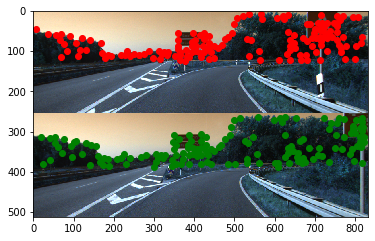

In [5]:
plt.imshow(cat_images, aspect='equal')
num_show = 150

keypoints = outs_dict['keypoints']

count = 0
for keypoint in keypoints[0]:
    if count == num_show:
        break
    plt.plot(keypoint[0], keypoint[1], 'o', color='red')
    count += 1
    
count = 0
for keypoint in keypoints[1]:
    if count == num_show:
        break
    plt.plot(keypoint[0], keypoint[1] + h, 'o', color='green')
    count += 1
    
plt.savefig('keypoint_out.png')

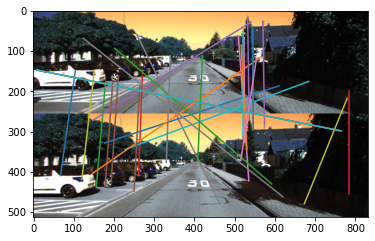

In [7]:
import random
plt.imshow(cat_images, aspect='equal')

for i in range(30):
    idx = random.randint(0, superglue_correspondences.shape[0])
    plt.plot([superglue_correspondences[idx][0], superglue_correspondences[idx][2]], [superglue_correspondences[idx][1], superglue_correspondences[idx][3] + h])

plt.savefig('superglue_sampled_correspondences.png')

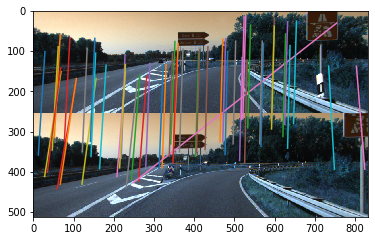

In [7]:
import random
plt.imshow(cat_images, aspect='equal')

for i in range(50):
    idx = random.randint(0, superglueflow_correspondences.shape[0])
    plt.plot([superglueflow_correspondences[idx][0], superglueflow_correspondences[idx][2]], [superglueflow_correspondences[idx][1], superglueflow_correspondences[idx][3] + h])

plt.savefig('superglueflow_sampled_correspondence_out.png')